# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Описание данных:**<br>
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)<br>
`balcony` — число балконов<br>
`ceiling_height` — высота потолков (м)<br>
`cityCenters_nearest` — расстояние до центра города (м)<br>
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)<br>
`first_day_exposition` — дата публикации<br>
`floor` — этаж<br>
`floors_total` — всего этажей в доме<br>
`is_apartment` — апартаменты (булев тип)<br>
`kitchen_area` — площадь кухни в квадратных метрах (м²)<br>
`last_price` — цена на момент снятия с публикации<br>
`living_area` — жилая площадь в квадратных метрах (м²)<br>
`locality_name` — название населённого пункта<br>
`open_plan` — свободная планировка (булев тип)<br>
`parks_around3000` — число парков в радиусе 3 км<br>
`parks_nearest` — расстояние до ближайшего парка (м)<br>
`ponds_around3000` — число водоёмов в радиусе 3 км<br>
`ponds_nearest` — расстояние до ближайшего водоёма (м)<br>
`rooms` — число комнат<br>
`studio` — квартира-студия (булев тип)<br>
`total_area` — общая площадь квартиры в квадратных метрах (м²)<br>
`total_images` — число фотографий квартиры в объявлении<br>

## Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Прочитаем файл и выводим первых 5 строк полученного датафрейма:

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Выводим информацию о датафрейме:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Уточняем количество явных дубликатов:

In [5]:
print('Количество дубликатов: ', data.duplicated().sum())

Количество дубликатов:  0


Уточняем количество пропусков:

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Построим гистограмму для всех числовых столбцов таблицы:

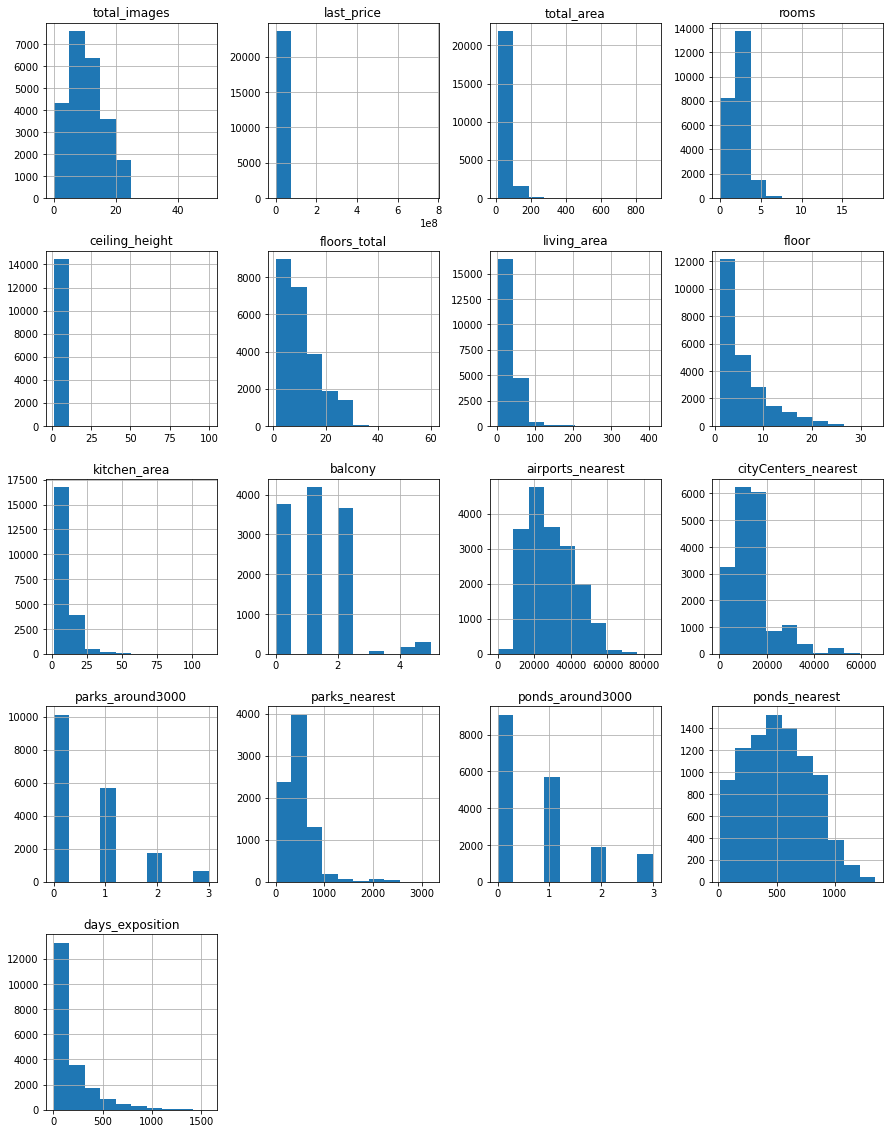

In [9]:
data.hist(figsize=(15, 20));

### Промежуточный вывод

В таблице 23699 строки и 22 столбца. Явные дубликаты отсутвуют. Во многих стобцах имеются пропуски и некорректный тип данных.
Так же присутсвуют аномальные значения. Вероятно пропуски и некоректне значения связаны с "человеческим" фактором или технический сбой при выгрузке.

## Выполните предобработку данных

### Работа с пропусками в столбцах и изменение типа данных

Переименуем столбец `cityCenters_nearest` в соответствии со стилем snake_case

In [10]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace = True )
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [11]:
data.isna().sum() # eщё раз посмотрим количество пропусков в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Начнем по порядку. В столбце `ceiling_height`(высота потолков) - 9195 пропусков.<br>
По-видемому пропуски в этом стобце связаны с "человеческим" фактором (к примеру пропустили по не знанию или отсутствия данных).
заменим их медианным значением методом median(). 

In [12]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
print('Пропущенных значений:', data['ceiling_height'].isna().sum())

Пропущенных значений: 0


В столбце `floors_total`(всего этажей в доме) - 86 попусков. 

In [13]:
data.loc[data['floors_total'].isnull(),['floor']].head(10)

,floor
186,4
237,1
457,12
671,8
1757,9
1930,4
2392,22
2846,15
2952,6
3031,12


Пропусков не много и при этом этаж, на котором находится квартира, указан. Вероятно пропуски имеют "человеческий" фактор. Заменим их медианными значениями по каждой этажности дома.

In [14]:
# Строим сводную таблицу с медианным значением столбца 'floors_total'
floor_median = data.pivot_table(index='floor', values='floors_total', aggfunc='median').reset_index()

# Строим цикл
for index in range(data.floor.min(), (data.floor.max()+1)):
    data.loc[data['floor'] == index, 'floors_total'] = \
    (data.loc[data['floor'] == index, 'floors_total'] \
    .fillna(floor_median[floor_median['floor'] == index]['floors_total'].sum()))
    
print('Пропущенных значений:', data['floors_total'].isnull().sum())

Пропущенных значений: 0


In [15]:
# проверка на корректность:
print('Некорректных значений: ', data[data['floors_total'] < data['floor']]['floors_total'].count())

Некорректных значений:  0


Заменим неверный тип данных на целочисленный тип int.

In [16]:
data['floors_total'] = data['floors_total'].astype(int)

In [17]:
data['floors_total'].dtypes #проверим результат

dtype('int64')

В столбце `living_area`- 1903 пропуска и в столбце `kitchen_area`- 2278 пропуска. Явно имеют "человеческий" фактор (пропустили так как не знали данные). Заменим их на средние значения в зависимости от общей площади `total_area`.

In [18]:
# проверка на корректность до обработки пропусков:
data.query('total_area*0.9 <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.65,14,59.0,8,False,False,False,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9,38.0,8,NaN,False,False,10.0,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9,26.1,5,NaN,False,False,6.2,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25,28.0,6,NaN,False,False,9.0,NaN,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
319,19,4850000.0,59.7,2015-03-19T00:00:00,3,2.50,5,47.4,4,NaN,False,False,6.4,1.0,Санкт-Петербург,43095.0,15599.0,0.0,NaN,0.0,NaN,974.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23216,15,10150000.0,114.0,2015-01-21T00:00:00,4,2.65,5,90.2,4,NaN,False,False,16.0,NaN,Санкт-Петербург,26259.0,4961.0,0.0,NaN,2.0,838.0,1052.0
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,2.65,5,42.2,2,NaN,False,False,6.0,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,2.65,14,40.0,8,NaN,False,False,10.0,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,2.65,4,44.0,2,NaN,False,False,15.3,NaN,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN


**В данных имеются некорректные данные по жилой площади. Вероятно пользователи указывали не верное значение жилой площади по не знанию или ошибочно. Количество таких записей 534 - небольшое значение, меньше 2%. Исправить верными значениями нет возможности, оставим как есть.**

In [19]:
data['living_area'].fillna((data['living_area'].mean() / data['total_area'].mean()) * data['total_area'], inplace=True)
data['living_area'] = data['living_area'].round(2)
data['kitchen_area'].fillna((data['kitchen_area'].mean() / data['total_area'].mean()) * data['total_area'], inplace=True)
data['kitchen_area'] = data['kitchen_area'].round(2)

In [20]:
# Проверка количества пропусков:
data['living_area'].isna().sum()

0

In [21]:
data['kitchen_area'].isna().sum()

0

In [22]:
# проверка на корректность после обработки пропусков:
data.query('total_area*0.9 <= (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,2.65,14,59.00,8,False,False,False,12.00,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
171,6,3800000.0,49.0,2019-02-22T00:00:00,2,2.50,9,38.00,8,NaN,False,False,10.00,1.0,посёлок Шушары,18471.0,24272.0,0.0,NaN,0.0,NaN,11.0
184,7,2600000.0,30.2,2018-02-14T00:00:00,1,2.65,9,26.10,5,NaN,False,False,6.20,NaN,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0
220,8,3890000.0,37.0,2018-07-09T00:00:00,1,2.50,25,28.00,6,NaN,False,False,9.00,NaN,Санкт-Петербург,25408.0,16166.0,0.0,NaN,0.0,NaN,28.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,5,20.75,1,NaN,False,False,4.92,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23297,10,1850000.0,48.2,2019-03-13T00:00:00,2,2.65,5,42.20,2,NaN,False,False,6.00,1.0,Высоцк,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23328,12,4299000.0,54.0,2016-11-25T00:00:00,2,2.65,14,40.00,8,NaN,False,False,10.00,0.0,Колпино,25612.0,31399.0,0.0,NaN,0.0,NaN,343.0
23521,13,8500000.0,65.0,2018-11-01T00:00:00,2,2.65,4,44.00,2,NaN,False,False,15.30,NaN,Санкт-Петербург,22276.0,3996.0,1.0,627.0,0.0,NaN,NaN
23579,7,2350000.0,24.8,2018-06-07T00:00:00,1,2.65,10,18.00,2,NaN,False,False,4.34,NaN,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,89.0


В данных количество строк с некорректными данными не изменилось.

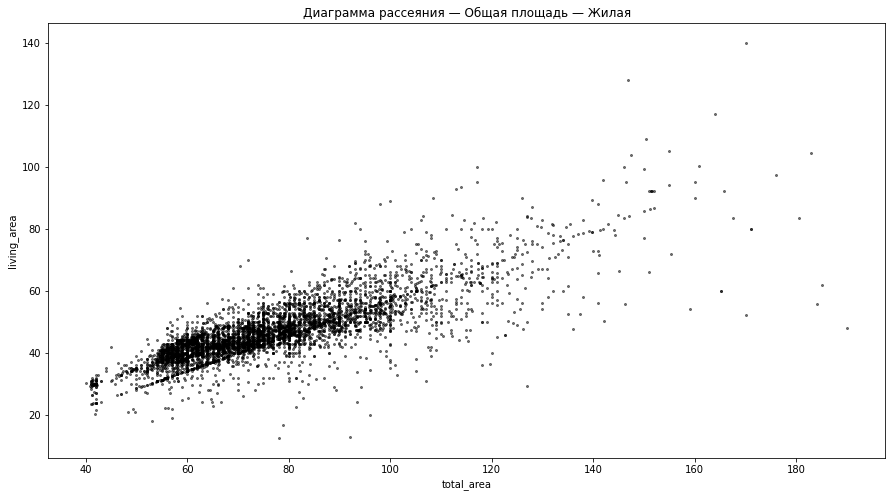

In [23]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

Столбец `is_apartment`(апартаменты) имеют пропуски так как вероятно пользователи сайта не указывают его если квартира жилая.
Посмотрим сколько всего апартаментов в предоставленных данных. 

In [24]:
data.groupby('is_apartment', as_index=False).agg({'rooms':'count'})

,is_apartment,rooms
0,False,2725
1,True,50


Из общего числа всего 50 апартаментов. Заменим пропуски на False. В столбце используются булевы значения изменим тип данных на bool.

In [25]:
data.is_apartment = data.is_apartment.fillna(False).astype(bool)

In [26]:
print('Пропущенных значений:', data['is_apartment'].isnull().sum()) #проверим результат
data['is_apartment'].dtypes

Пропущенных значений: 0


dtype('bool')

В столбце `balcony`(число балконов) пропуски по-видемому получились в связи отсутствия балконов (пользователи пропустили этот пункт).
Заменим пропуски на 0 и за одно заменим тип данных на целочисленный тип int.

In [27]:
data['balcony'] = data['balcony'].fillna(0).astype(int)

In [28]:
print('Пропущенных значений:', data['balcony'].isna().sum()) #проверим результат
data['balcony'].dtypes

Пропущенных значений: 0


dtype('int64')

В столбце `locality_name`(название населённого пункта) - 49 пропусков скорее всего попали в данные по ошибке. Нет возможности заполнить пропуски и определить населённый пункт. Вероятно они вообще не имеют отношения к Санкт-Петербургу.
Так как пропусков не много удаляем строки у которых отсутствуют данные в этом столбце.

In [29]:
data = data.dropna(subset=['locality_name']) # удаление пропусков
print("Пропущенных значений:", data.locality_name.isna().sum())

Пропущенных значений: 0


В столбцах `airports_nearest`,`city_centers_nearest`,`parks_around3000`,`parks_nearest`,`ponds_around3000`,`ponds_nearest`,`days_exposition` данные получены автоматически на основе картографических данных. То есть пропуски в этих столбцах появились в результате технического сбоя при загрузке на сайт. Заменить пропуски какими-либо подходящими и верными значениями нет возможности. <br>Оставляем без изменения.

Проверяем итог проделаной работы с пропусками:

In [30]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

В столбце `last_price` поменяем тип данных на целочисленный int.

In [31]:
data['last_price'] = data['last_price'].astype(int)

In [32]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

В столбце `first_day_exposition` поменяем тип данных на datetime.

In [33]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [34]:
data.info() #проверяем результат

data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.79,9,False,False,False,27.85,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В столбце `locality_name` проверяем и устраняем неявные дубликаты в названиях населённых пунктов.

In [35]:
print('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

Количество уникальных значений: 364


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В начале избавимся от буквы Ё в названиях:

In [36]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [37]:
print('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

Количество уникальных значений: 330


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

Количество явных дубликатов уменьшилось на 34. <br>
Удалим в названиях тип населённых пунктов, так как дальнейшее иследование только с цифрами и это на результат не повлияет.

In [38]:
data['locality_name'] = (
    data['locality_name']
    .replace(['поселок при железнодорожной станции ','поселок станции ',
              'городской поселок ','деревня ','коттеджный поселок ','поселок ', 
              'поселок городского типа ','городского типа ',
              'садоводческое некоммерческое товарищество ',
              'садовое товарищество ','село '],'', regex=True)
)

In [39]:
print('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].sort_values().unique()

Количество уникальных значений: 305


array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

#### check name

### Промежуточный вывод

 В ходе проделанной работы над предобработкой данных:
<ol>
    <li>Переименован столбец "cityCenters_nearest" в соответствии со стилем snake_case. </li>
    <li>В столбцах "ceiling_height", "floors_total", "living_area", "kitchen_area", "is_apartment", "balcony" пропуски были заполнены соответсвующими значениями. В столбце "locality_name" пропуски были удалены. </li>
    <li>В стобцах "floors_total", "is_apartment", "balcony","last_price", "first_day_exposition" был изменён некоректный тип.</li>
    <li>В столбце "locality_name" исправлены неявные дубликаты.</li>

Пропуски в данных возникли из-за не заполнения всех значений пользователями и технического фактора (сбои при загрузке и выгрузки данных).
Данные подготовленны и достаточны для дальнейшего иследования.

## Добавьте в таблицу новые столбцы

Произведем расчёт и добавим в таблицу:
 - `price_square_meter` - цена одного квадратного метра;
 - `day_publication` - день недели публикации объявления;
 - `month_publication` - месяц публикации объявления;
 - `years_publication` - год публикации объявления;
 - `floor_categor` - тип этажа квартиры (значения — «первый», «последний», «другой»);
 - `city_centers_nearest_km` - расстояние до центра города в километрах.

### Цена одного квадратного метра

In [41]:
data['price_square_meter'] = data['last_price'] / data['total_area']
data['price_square_meter'] = data['price_square_meter'].round(2)
data['price_square_meter'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_square_meter, dtype: float64

### День недели, месяц и год публикации объявления.

In [42]:
data['day_publication'] = data['first_day_exposition'].dt.weekday
data['month_publication'] = data['first_day_exposition'].dt.month
data['years_publication'] = data['first_day_exposition'].dt.year

### Тип этажа квартиры

Создадим функцию которая осортирует этажи на «первый», «последний», «другой».<br>
Добавим столбец `floor_categor`:

In [43]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_categor'] = data.apply(floor_group, axis=1)

In [44]:
data['floor_categor'].value_counts()

другой       17408
последний     3330
первый        2912
Name: floor_categor, dtype: int64

### Расстояние до центра города в километрах.

In [45]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()
data['city_centers_nearest_km'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: city_centers_nearest_km, dtype: float64

## Проведите исследовательский анализ данных.

###  Изучение и описание параметров:

#### Общая площадь:

Общая площадь квартиры находится в столбце `total_area`.

In [46]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

В данных представленны квартиры с площадью от 12 до 900 квадратных метров. Всего записей 23650. Среднее = 60.33 кв.м.. Медиана = 52.00 кв.м.. Построим гистограмму.

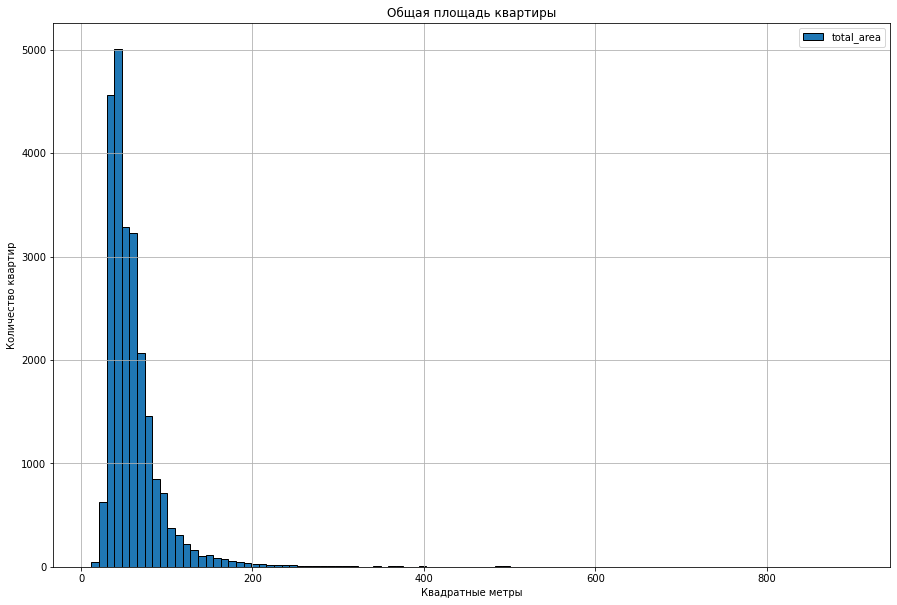

In [47]:
data['total_area'].hist(bins=100,figsize=(15, 10), ec='black', legend=True)
plt.title('Общая площадь квартиры')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

По гистограмме видно что квартир с большой общей площадью более 100 кв.м. мало. С общей площадью больше 200 кв.м. еденичны и являются выбросами. Построим гистограмму без учета выбросов.

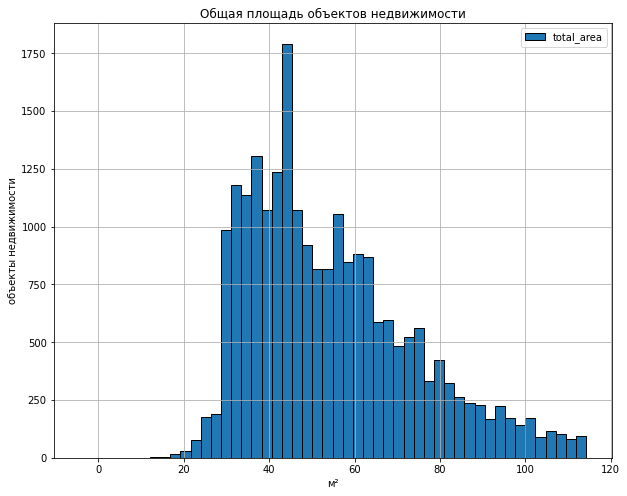

In [48]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['total_area'].quantile(.25) # первый квартиль Q1
q3 = data['total_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
data['total_area'].hist(bins=50, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 8), ec='black', legend=True)
plt.title('Общая площадь объектов недвижимости')
plt.xlabel('м²')
plt.ylabel('объекты недвижимости')
plt.show()

**Рассматриваем диапазон примерно от 15 до 115 кв.метров, исключая выбросы. Большая часть квартир имеют площадь от 30 до 70 кв.метров. Самый распространенный вариант - около 45 кв.метров. Площадь объектов больше 100 кв.метров встречается редко, так же как и с площадью меньше 30 кв.метров. Среднее значение 60 кв.метров и медиана 52 кв.метров.** 

#### Жилая площадь:

Информация по жилой площади квартиры находится в столбце `'living_area`.

In [49]:
data['living_area'].describe()

count    23650.000000
mean        34.582274
std         22.359589
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

В данных представленны квартиры с жидой площадью от 2 до 409 квадратных метров. Всего записей 23650. Среднее = 34.58 кв.м.. Медиана = 30.00 кв.м.. Построим гистограмму.

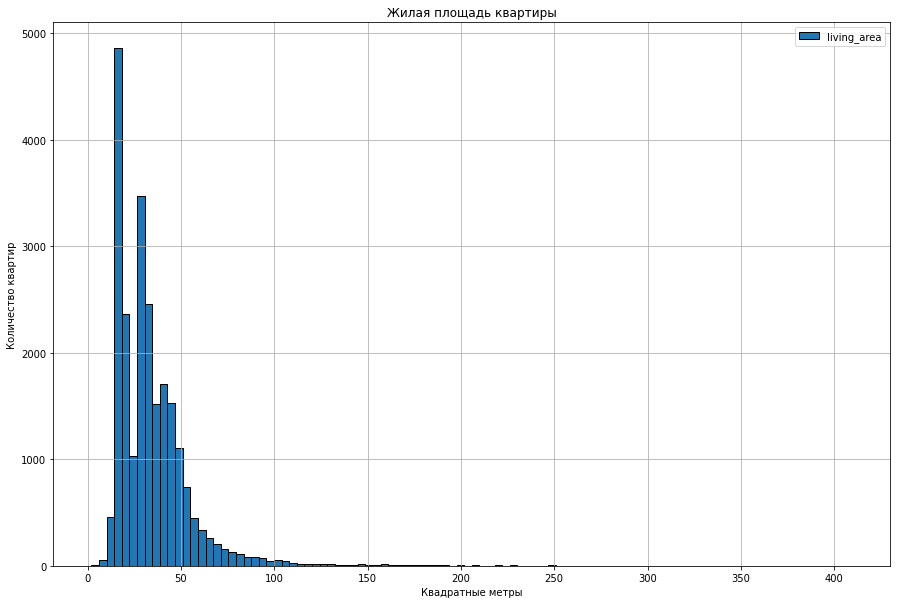

In [50]:
data['living_area'].hist(bins=100,figsize=(15, 10), ec='black', legend=True)
plt.title('Жилая площадь квартиры')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Так же как и с общей площадью квартиры с жилой площадью больше 100 кв.м. единичны. Построим гистограмму без учета выбросов.

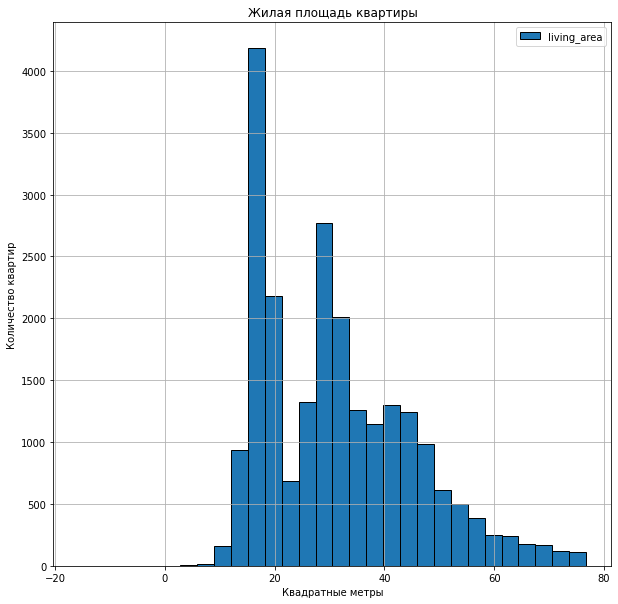

In [51]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['living_area'].quantile(.25) # первый квартиль Q1
q3 = data['living_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
data['living_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 10), ec='black', legend=True)
plt.title('Жилая площадь квартиры')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Рассматриваем диапазон от 10 кв.метров до примерно 78 кв.метров, исключая выбросы. Большая часть квартир имеют жилую площадь от 18 до 45 кв.метров. Самый распространенный варианты - около 18 и 30 кв.метров. Жилая площадь объектов более 60 кв.метров встречается редко и с площадью меньше 15 кв.метров также редко. Среднее значение - 34,5 кв.метров, медиана 30 кв.метров.**

#### Площадь кухни:

Информация по площади кухни квартиры находится в столбце `kitchen_area`.

In [52]:
data['kitchen_area'].describe()

count    23650.000000
mean        10.502864
std          6.037448
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

В данных представленны квартиры с площадью кухни от 1.3 до 112 квадратных метров. Всего записей 23650. Среднее = 10.5 кв.м.. Медиана = 9.00 кв.м.. Построим гистограмму без учета выбросов.

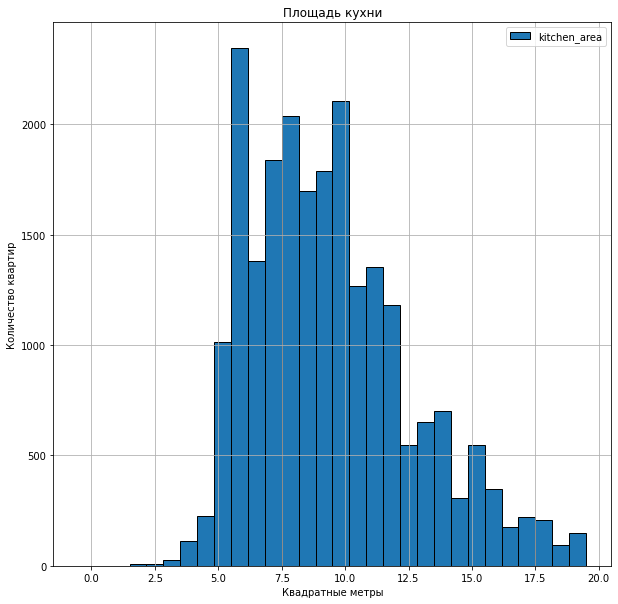

In [53]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['kitchen_area'].quantile(.25) # первый квартиль Q1
q3 = data['kitchen_area'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму площади
data['kitchen_area'].hist(bins=30, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 10), ec='black', legend=True)
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

**Рассматриваем диапазон от 2 до 19 кв.метров, исключая выбросы. Большая часть квартир имеют площадь кухни от 5 до 12 кв.метров. Самые распространенные варианты: около 6; 8 и 10 кв.метров . Площадь кухни более 14 кв.метров встречается редко. Площадь кухни менее 5 кв.метров также редкость. Среднее значение 10,5 кв.метров и медиана 9 кв.метров.**

#### Цена объекта:

Информация по цене квартиры находится в столбце `last_price`.

In [54]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В данных представлены квартиры с ценной от 12190 рублей до 763 млн. рублей. Построим гистограмму исключая выбросы.

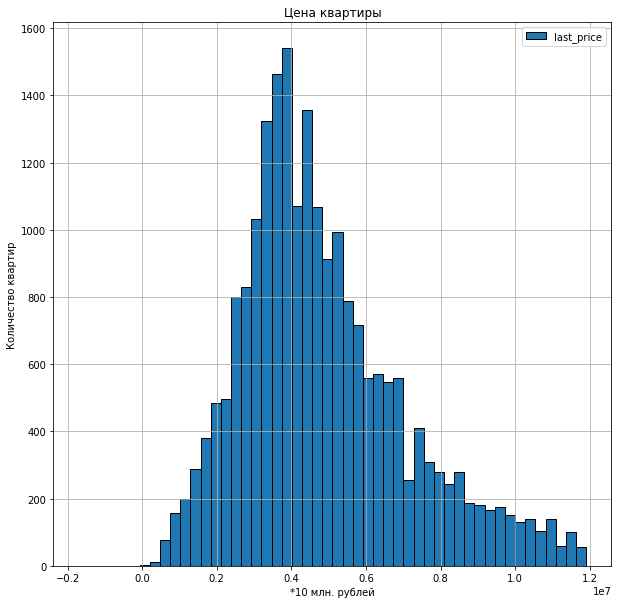

In [55]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['last_price'].quantile(.25) # первый квартиль Q1
q3 = data['last_price'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму цены
data['last_price'].hist(bins=50, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 10), ec='black', legend=True)
plt.title('Цена квартиры')
plt.xlabel('*10 млн. рублей')
plt.ylabel('Количество квартир')
plt.show()

**Рассматриваем диапазон до примерно 12 млн. рублей, исключая выбросы. Большинство квартир имеют цену в пределах от 2,5 до 7 млн. руб.. Самый распространенный вариант - около 4 млн.руб.. Вариантов с ценой более 8 млн. немного. Среднее значение - 6,5 млн.руб, медиана 4,6 млн.руб..**

#### Количество комнат:

Информация по количеству комнат в квартире находится в столбце `rooms`.

In [56]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В данных есть квартиры с числом комнат от 0 до 19. Рассмотрим данные подробней.

In [57]:
data.groupby('rooms').agg({'rooms':'count'})

,rooms
rooms,
0,197
1,8036
2,7924
3,5797
4,1175
5,326
6,105
7,59
8,12


In [58]:
data[data['rooms'] == 0].sort_values('total_area', ascending= False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,years_publication,floor_categor,city_centers_nearest_km
19392,5,71000000,371.0,2018-07-26,0,3.57,7,211.83,6,False,False,True,64.98,0,Санкт-Петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0,191374.66,3,7,2018,другой,6.0
20082,10,16300000,98.4,2017-11-08,0,3.10,5,60.50,2,False,True,False,17.23,0,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0,165650.41,2,11,2017,другой,6.0
3458,6,7400000,73.6,2017-05-18,0,2.65,3,50.00,1,False,True,False,12.89,0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0,100543.48,3,5,2017,первый,6.0
21227,0,8200000,71.0,2017-07-21,0,5.80,5,68.00,5,False,True,False,12.44,0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0,115492.96,4,7,2017,последний,1.0
13613,16,8100000,58.4,2019-04-26,0,3.30,7,33.00,6,False,True,False,10.23,0,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN,138698.63,4,4,2019,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1,1350000,18.8,2017-11-22,0,2.75,19,15.80,1,False,True,False,3.29,0,Санкт-Петербург,37636.0,14479.0,0.0,NaN,1.0,1127.0,128.0,71808.51,2,11,2017,первый,14.0
12996,8,1900000,18.0,2019-01-25,0,2.60,5,16.00,3,False,True,False,3.15,0,Санкт-Петербург,19573.0,15772.0,2.0,149.0,2.0,496.0,10.0,105555.56,4,1,2019,другой,16.0
716,5,1500000,17.0,2017-06-07,0,2.70,9,12.00,1,False,True,False,2.98,0,Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0,88235.29,2,6,2017,первый,30.0
9412,5,2100000,16.0,2017-12-10,0,2.65,6,13.00,1,False,False,True,2.80,0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0,131250.00,6,12,2017,первый,2.0


В данных есть квартиры с числом комнат равное 0. Таких квартир 197. Таким образом пользователи обозначали квартиры с открытой планировкой и квартиры-студии.

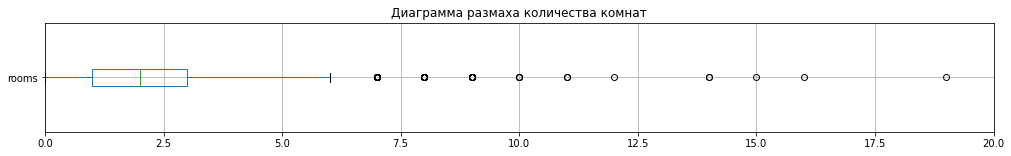

In [59]:
fig, ax = plt.subplots(figsize = (17,2))
ax = data[['rooms']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха количества комнат')
ax.set_xlim(0, 20);

По диаграмме размаха видно что квартиры с комнатами больше 6 это выбросы.

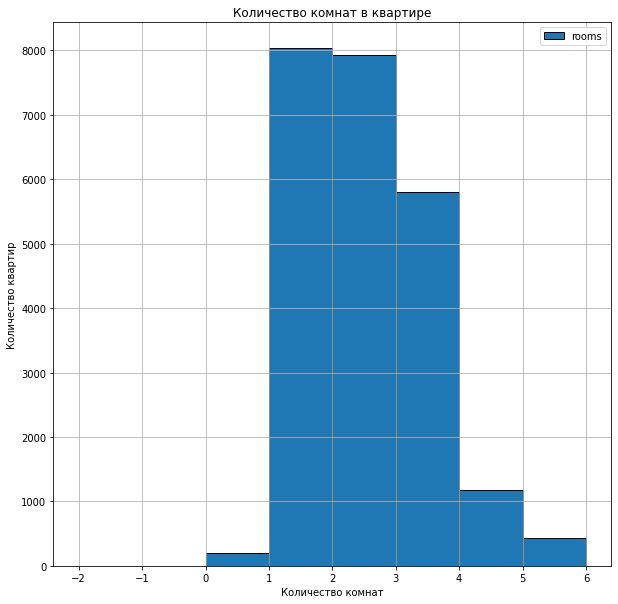

In [60]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['rooms'].quantile(.25) # первый квартиль Q1
q3 = data['rooms'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму кол-ва комнат
data['rooms'].hist(bins=8, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 10), ec='black', legend=True)
plt.title('Количество комнат в квартире')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

**Рассматриваемый диапазон от 0 до 6 комнат, исключая выбросы. Квартиры с количество 0 комнат пользователи так обозначают квартиры со свободной планировкой и квартиры-студии и таких квартир немного(всего 197 записей). Большая часть квартир имеют 1 или 2 комнаты, чуть меньше - 3 комнаты. 4-, 5- и 6-комнатных квартир немного. Среднее и медиана 2 комнаты точны. Крайне редкие значения (от 7 до 16 комнат) не оказывают существенного влияния на среднее значение.**

#### Высота потолков:

Информация по высоте потолков в квартире находится в столбце `ceiling_height`.

In [62]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

В представленных данных есть квартиры с высотой потолков от 1 до 100 метров. Медианна равна 2.65 и среднее 2.72 метра. Рассмотрим этот столбец подробней.

In [63]:
# количество квартир с потолками меньше 2,7 метра:
data[data['ceiling_height'] < 2.7].groupby('ceiling_height', as_index=False).agg({'rooms':'count'})

,ceiling_height,rooms
0,1.00,1
1,1.20,1
2,1.75,1
3,2.00,11
4,2.20,1
5,2.25,1
6,2.30,4
7,2.34,1
8,2.40,23
9,2.45,15


In [64]:
# количество квартир с потолками больше 6,0 метра:
data[data['ceiling_height'] > 6.0].groupby('ceiling_height', as_index=False).agg({'rooms':'count'})

,ceiling_height,rooms
0,8.0,3
1,8.3,1
2,10.3,1
3,14.0,1
4,20.0,1
5,22.6,1
6,24.0,1
7,25.0,7
8,26.0,1
9,27.0,8


В столбце с высотой потолков есть явно ошибочные записи. Логично предположить что высота потолков меньше 2,4 метра это опечатка, так же и с потолками больше 6,0 метров. Заменим такие значения медианными, а значения с высотой потолков от 24,0 до 32,0 метров поделим на 10. И построим гистограмму.

In [65]:
data.loc[data['ceiling_height'] < 2.4,'ceiling_height'] = data['ceiling_height'].median()
data.loc[(data['ceiling_height'] > 6.0)&(data['ceiling_height'] < 24.0),'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] == 100.0,'ceiling_height'] = data['ceiling_height'].median()
data.loc[(data['ceiling_height'] >= 24.0)&(data['ceiling_height'] <= 32.0),'ceiling_height'] = data['ceiling_height']/10

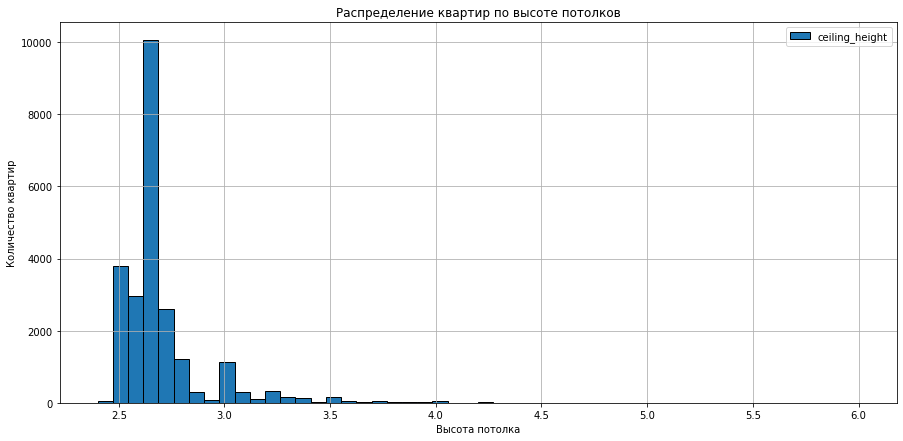

In [66]:
data.plot(kind='hist',y='ceiling_height',grid=True, bins=50, figsize=(15,7), ec='black')
plt.title('Распределение квартир по высоте потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

По гистограмме видно что у большинства квартир высота потолков от 2.5 до 2.75 метра.с потолками больше 3.0 метра количество квартир совсем немного. Построим гистограмму без учета выбросов.

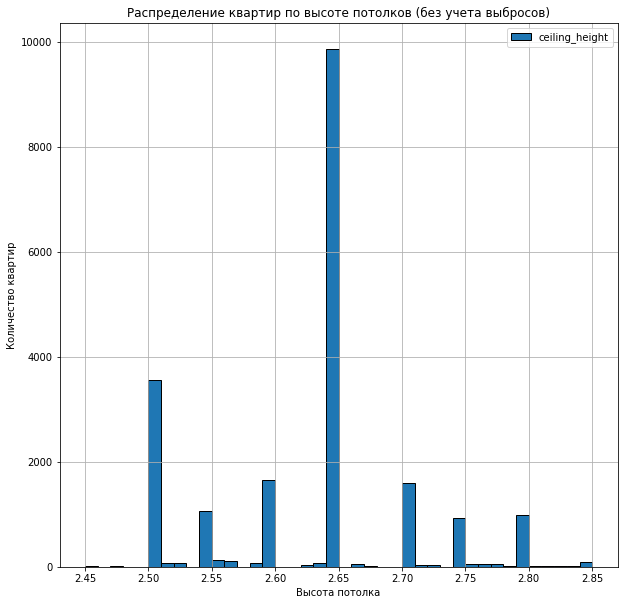

In [67]:
# Рассчитаем Q1, Q3 и IQR чтобы построить график без выбросов
q1 = data['ceiling_height'].quantile(.25) # первый квартиль Q1
q3 = data['ceiling_height'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму кол-ва комнат
data['ceiling_height'].hist(bins=40, range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)), figsize=(10, 10), ec='black', legend=True)
plt.title('Распределение квартир по высоте потолков (без учета выбросов)')
plt.xlabel('Высота потолка')
plt.ylabel('Количество квартир')
plt.show()

**Самый распространённый вариант квартир из предложений с высотой потолков 2,65 метра. Почти в 3 раза реже встречаются квартиры с потолками 2,5 метра. Доля остальных квартир по высоте потолков незначительна. Высота потолков 3,0 и более метра встречаются крайне редко и попадают в категорию выбросов. Это говорит о том, что на рынке недвижимости преобладают типовые квартиры.**

#### Тип этажа квартиры:

В данных это добавленный столбец `floor_categor`.

In [68]:
data['floor_categor'].describe()

count      23650
unique         3
top       другой
freq       17408
Name: floor_categor, dtype: object

Посмотрим на количествово в каждой категории:

In [69]:
data.groupby('floor_categor', as_index=False).agg({'rooms':'count'})

,floor_categor,rooms
0,другой,17408
1,первый,2912
2,последний,3330


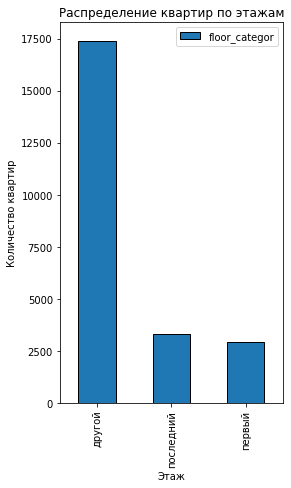

In [70]:
data['floor_categor'].value_counts().plot.bar(figsize=(4, 7), ec='black', legend=True)
plt.title('Распределение квартир по этажам')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

**Распределение квартир поэтажам показывает что большинство предложений располагается на средних этажах. В три раза меньше предложений на крайних этажах.**

#### Общее количество этажей в доме:

Информация по количеству этажей в доме находится в столбце `floors_total`.

In [71]:
data['floors_total'].describe()

count    23650.000000
mean        10.684059
std          6.597081
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [72]:
data.sort_values('floors_total', ascending= False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,years_publication,floor_categor,city_centers_nearest_km
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,False,False,7.40,0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,83516.48,3,6,2018,другой,49.0
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,False,False,14.00,0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,99450.00,0,9,2018,другой,13.0
16934,5,4100000,40.0,2017-10-17,1,2.65,37,17.4,5,False,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,102500.00,1,10,2017,другой,20.0
397,15,5990000,54.0,2018-03-22,2,2.65,36,21.4,28,False,False,False,18.70,1,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0,110925.93,3,3,2018,другой,20.0
11079,16,9200000,75.0,2019-02-22,2,2.70,36,40.0,29,False,False,False,12.00,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,122666.67,4,2,2019,другой,20.0


В данных в строке с индексом 2253 столбец `floors_total` присутствует явно ошибочная запись, так как в Кронштате нет здания такой этажности. Вероятно опечатка с нулём. Уберем ноль в значении. И построим гистограмму.

In [73]:
data.loc[2253, 'floors_total'] = 6

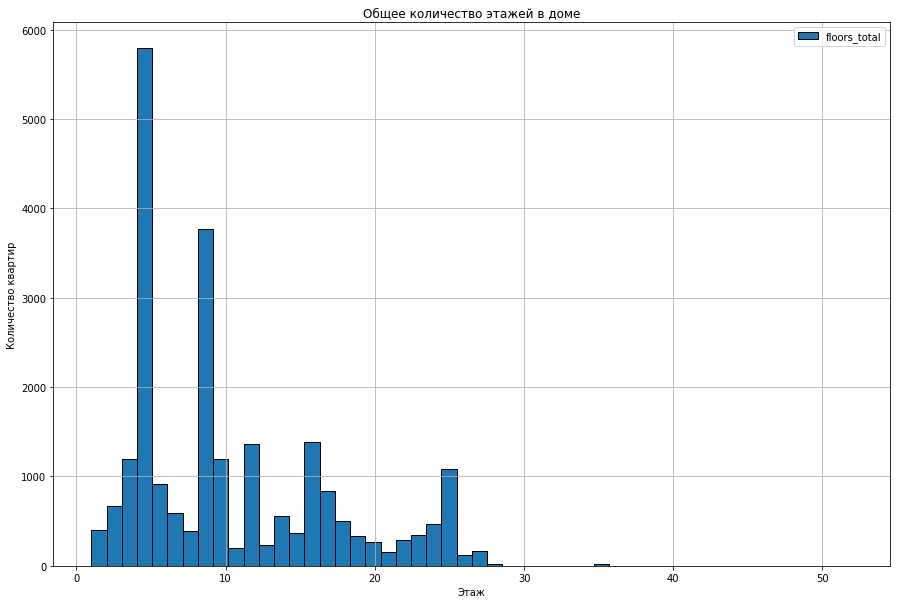

In [74]:
data['floors_total'].hist(bins=50,figsize=(15, 10), ec='black', legend=True)
plt.title('Общее количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

**Самое большое количество квартир в 5-этажных домах. Немного меньше квартир в 9-этажных домах. Медиана = 9 и среднее 10.**

#### Расстояние до центра города в метрах:

Информация по этому параметру находится в столбце `city_centers_nearest`.

In [75]:
data['city_centers_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

У порядка 5500 квартир (примерно четверть квартир) отсутствуют данные по этому параметру. Построим гистограмму по имеющимся данным.

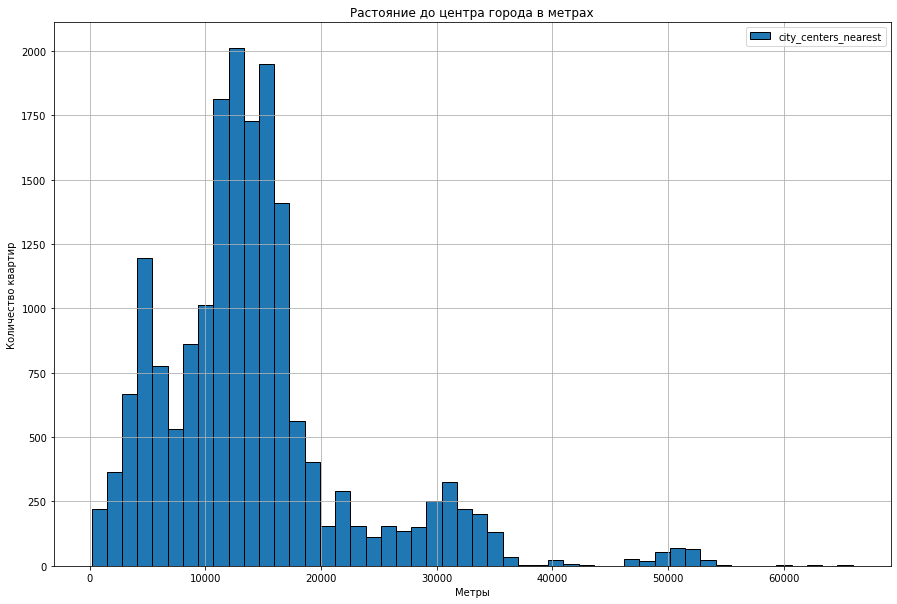

In [76]:
data['city_centers_nearest'].hist(bins=50,figsize=(15, 10), ec='black', legend=True)
plt.title('Растояние до центра города в метрах')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

**По гистограмме видно что большинство предложений по квартирам находится на растояннии 11000 - 18000 метров от центра. В этом же промежутке находится среднее = 14200м и медиана = 13105м.**

#### Расстояние до ближайшего парка в метрах:

Информация по этому параметру находится в столбце `parks_nearest`.

In [77]:
data['parks_nearest'].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Только у порядка трети квартир есть данные по этому параметру. Построим гистограмму по имеющимся данным.

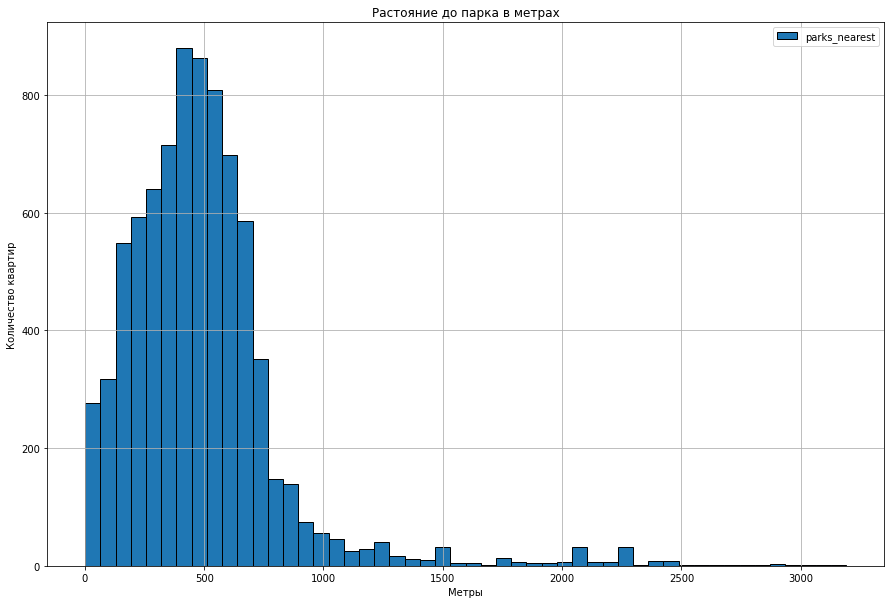

In [78]:
data['parks_nearest'].hist(bins=50,figsize=(15, 10), ec='black', legend=True)
plt.title('Растояние до парка в метрах')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

**По гистограммы видно что у квартир, в которых присутствуют данные о растоянии до парка, располагаются на растоянии 300-700 метров до парка. Среднее = 490 и медиана = 455 метра.**

#### Промежуточный вывод:

Из рассмотренных данных можно сделать вывод что большинство квартир:
- Имеют площадь от 30 до 70 кв.метров. Самый распространенный вариант - около 45 кв.метров.
- Имеют жилую площадь от 18 до 45 кв.метров. Самый распространенный варианты - около 18 и 30 кв.метров.
- Имеют площадь кухни от 5 до 12 кв.метров. Самые распространенные варианты: около 6; 8 и 10 кв.метров .
- С ценой в пределах от 2,5 до 7 млн. руб.. Самый распространенный вариант - около 4 млн.руб..
- Имеют 1 или 2 комнаты, чуть меньше - 3 комнаты.
- С высотой потоков 2,65 метра.
- Располагаются на средних этажах.
- Находятся в 5-этажных домах. Немного меньше квартир в 9-этажных домах.
- Находятся на растояннии 11000 - 18000 метров от центра.
- Располагаются на растоянии 300-700 метров до парка.

Из этого можно сделать вывод по типичной квартире из предложений:
- 2-комнатная квартира площадью 45 кв.метров с жилой площадью 30 кв.метров, имеет кухню 6 кв.метра и высоту потолка 2.65 метра. Расположенная на среднем этаже 5-этажного дома. Что соответствует по описанию квартирам-"хрущёвкам". Так же она находится в 11-18 километров от центра и в шаговой доступности до парка, то есть в "спальном" районе.


In [87]:
data.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                   0
living_area                    0
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                   0
balcony                        0
locality_name                  0
airports_nearest            5534
city_centers_nearest        5511
parks_around3000            5510
parks_nearest              15586
ponds_around3000            5510
ponds_nearest              14565
days_exposition             3180
price_square_meter             0
day_publication                0
month_publication              0
years_publication              0
floor_categor                  0
city_centers_nearest_km     5511
dtype: int64

### Исследовательский анализ данных.

#### Иследуем как быстро продавались квартиры.

В столбце `days_exposition` указано сколько дней было размещено каждое объявление. 

In [89]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

В столбце есть 20470 записи. Всего записей в иследуемых данных 23650. Отсутсвующие данные в этом столбце вероятно указывают что на момент формирования таблицы квартира ещё находилась на продаже, либо пользователи после продажи забыли снять объявление. <br> 
Медианна равна 95 дней и среднее 181 день.

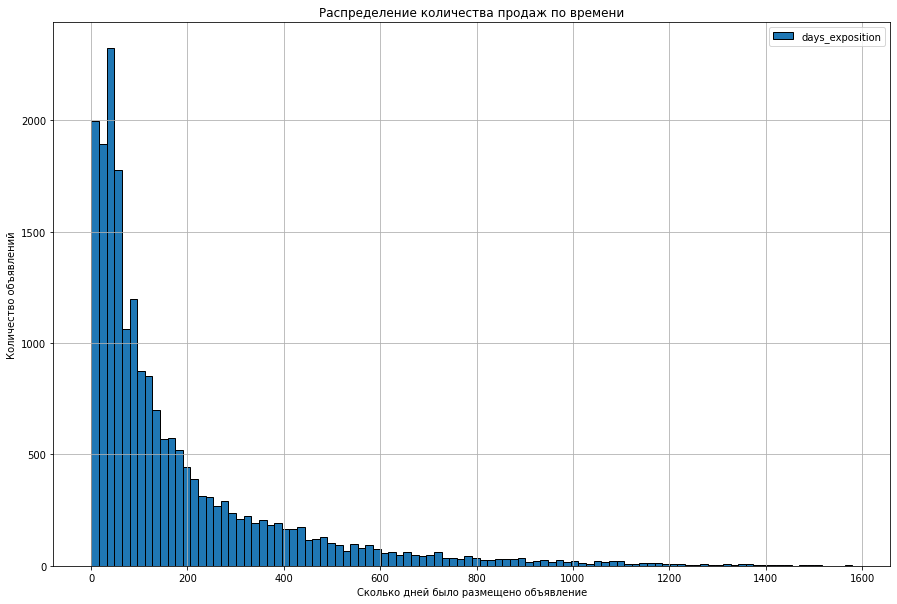

In [90]:
data['days_exposition'].hist(bins=100,figsize=(15, 10), ec='black', legend=True)
plt.title('Распределение количества продаж по времени')
plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество объявлений')
plt.show()

График имеет длинный хвост что говорит о большом количестве выбросов (долгие на продаже квартиры или не снятые с продажи объявления). Построим гистограмму без учета выбросов.

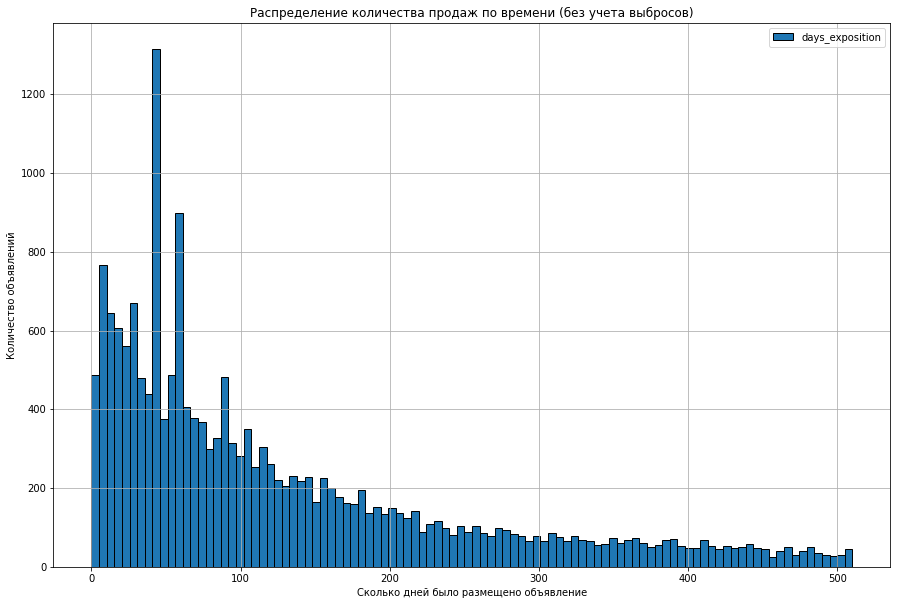

In [91]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1 = data['days_exposition'].quantile(.25) # первый квартиль Q1
q3 = data['days_exposition'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR

# Построим гистограмму времени продажи квартиры
data['days_exposition'].hist(bins=100, range=(0, (q3 + 1.5 * iqr)), figsize=(15,10), ec='black', legend=True)
plt.title('Распределение количества продаж по времени (без учета выбросов)')
plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество объявлений')
plt.show()

Гистограмма имеет несколько пиков и длинный хвост. Посмотрим на гистограмму по интервалу от 0 до 200 дней.

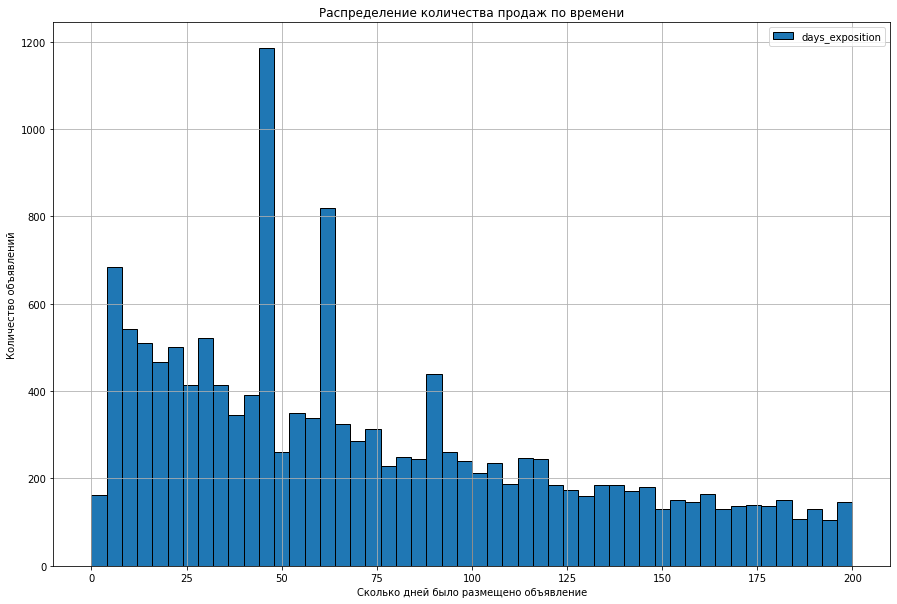

In [92]:
data['days_exposition'].hist(bins=50, range=(0,200), figsize=(15, 10), ec='black', legend=True)
plt.title('Распределение количества продаж по времени')
plt.xlabel('Сколько дней было размещено объявление')
plt.ylabel('Количество объявлений')
plt.show()

**Вывод: Гистограмма имеет большие пики в районе 45 и 60 дней. Вероятно в эти дни заканчивается срок размещения объявления. Данные в столбце `days_exposition`(сколько дней было размещено объявление) не достаточно верно указывают о времени продажи квартиры, так как нет данных по какой причине было снято объявление и снято вообще после продажи. Но тем немение можно выделить следующие периоды: до 45 дней характеризуется быстрая продажа, от 45 до 230 типичное время продажи и больше 231 дня долгая продажа. Среднее время продажи - 181 день и медианное - 95 дней.**

#### Определение факторов влияющие на общую стоимость объекта.

Изучим, зависит ли цена `last_price` от:
- `total_area` - общей площади;
- `living_area` - жилой площади;
- `kitchen_area` - площади кухни;
- `rooms` - количества комнат;
- `floor_categor` - этажа, на котором расположена квартира (первый, последний, другой);
- `price_square_meter` - цена одного квадратного метра;
- `city_centers_nearest_km` - расстояние до центра города в километрах;
- даты размещения (день недели - `day_publication`, месяц - `day_publication`, год- `year_publication`).

In [94]:
# Создадим список параметров для корреляции:
param_corr = [
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'price_square_meter',
    'city_centers_nearest_km',
    'day_publication',
    'month_publication',
    'years_publication'
]

Столбец `floor_categor` рассмотрим отдельно, т.к. он не содержит числовые значения.

In [95]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,years_publication,city_centers_nearest_km
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,18139.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.697212,10.681776,34.582274,5.893277,10.502864,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200,9.943225e+04,2.568710,6.401564,2017.370021,14.191576
std,5.682278,1.089640e+07,35.661808,1.078620,0.220362,6.589352,22.359589,4.883317,6.037448,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916,5.033794e+04,1.788808,3.491418,1.037806,8.614645
min,0.000000,1.219000e+04,12.000000,0.000000,2.400000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000,7.661496e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000,1.142742e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,6.000000,52.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


В данных имеются значения с выбросами.<br>
Для коректного анализа уберём такие значения.

In [96]:
def quartile_range(df, column): # Функция для подсчёта границ с учетом квартилей
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 2*iqr) & (df[column] > q1 - 2*iqr), column]
    return dfq

list_features = ['last_price',
                 'total_area',
                 'kitchen_area',
                 'living_area',
                 'days_exposition',
                 'rooms']# Столбцы с выбросами
for col in list_features:
    data[col] = quartile_range(data, col)

In [97]:
data.describe() # проверяем результат

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,years_publication,city_centers_nearest_km
count,23650.000000,2.213700e+04,22788.000000,23560.000000,23650.000000,23650.000000,23070.000000,23650.000000,22694.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,19285.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,18139.000000
mean,9.862326,5.030287e+06,55.443910,2.047326,2.697212,10.681776,32.189557,5.893277,9.598146,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,139.253254,9.943225e+04,2.568710,6.401564,2017.370021,14.191576
std,5.682278,2.502241e+06,21.018354,1.006837,0.220362,6.589352,14.837626,4.883317,3.448394,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,137.305106,5.033794e+04,1.788808,3.491418,1.037806,8.614645
min,0.000000,1.219000e+04,12.000000,0.000000,2.400000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.350000e+06,39.800000,1.000000,2.600000,5.000000,18.840000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,42.000000,7.661496e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.500000e+06,50.900000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,89.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.200000e+06,66.900000,3.000000,2.700000,16.000000,41.110000,8.000000,11.300000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,195.000000,1.142742e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,1.359500e+07,129.100000,6.000000,6.000000,52.000000,88.300000,33.000000,21.900000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,602.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


In [100]:
# Матрица корреляции:
last_price_corr = data[param_corr].corr()
display(last_price_corr)

,last_price,total_area,living_area,kitchen_area,rooms,price_square_meter,city_centers_nearest_km,day_publication,month_publication,years_publication
last_price,1.000000,0.724982,0.610072,0.541403,0.479018,0.613970,-0.356774,-0.019438,0.005312,-0.013813
total_area,0.724982,1.000000,0.914301,0.551313,0.787512,0.162098,-0.200689,-0.014524,0.009090,-0.069770
living_area,0.610072,0.914301,1.000000,0.337922,0.868424,0.105321,-0.195363,-0.006434,0.003080,-0.060486
kitchen_area,0.541403,0.551313,0.337922,1.000000,0.236709,0.291396,-0.182432,-0.012319,0.017003,-0.055705
rooms,0.479018,0.787512,0.868424,0.236709,1.000000,0.036470,-0.172891,-0.003130,-0.004060,-0.056945
price_square_meter,0.613970,0.162098,0.105321,0.291396,0.036470,1.000000,-0.318845,-0.007141,-0.001978,0.008894
city_centers_nearest_km,-0.356774,-0.200689,-0.195363,-0.182432,-0.172891,-0.318845,1.000000,0.008438,-0.009252,0.030355
day_publication,-0.019438,-0.014524,-0.006434,-0.012319,-0.003130,-0.007141,0.008438,1.000000,0.011354,-0.003844
month_publication,0.005312,0.009090,0.003080,0.017003,-0.004060,-0.001978,-0.009252,0.011354,1.000000,-0.271176
years_publication,-0.013813,-0.069770,-0.060486,-0.055705,-0.056945,0.008894,0.030355,-0.003844,-0.271176,1.000000


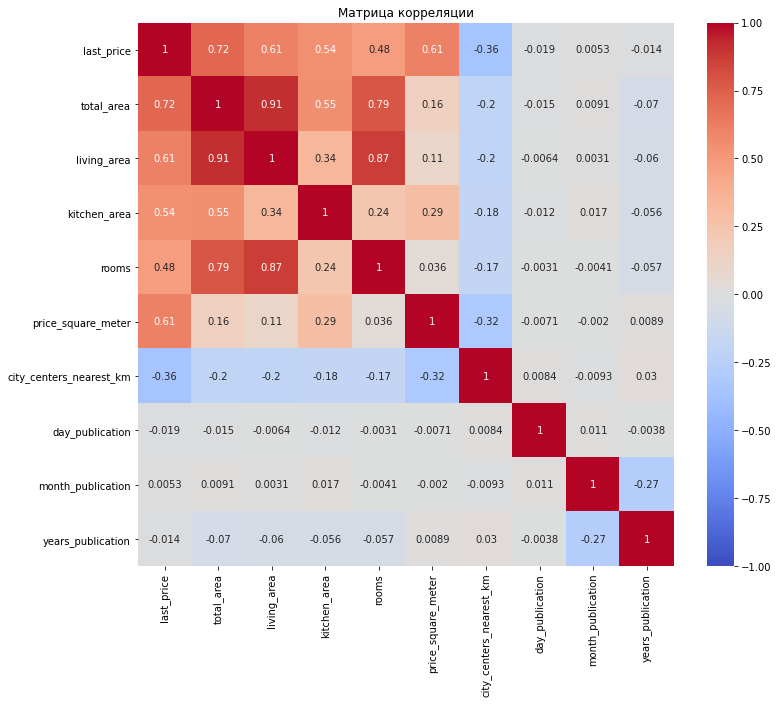

In [101]:
# Визуализируем матрицу корреляции
plt.figure(figsize = (12, 10))
sns.heatmap(last_price_corr, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Матрица корреляции')
plt.show()

На матрице видно большую положительную корреляцию между `last_price` и `total_area`. Корреляция между `last_price` и `living_area`, `kitchen_are`, `room`, `price_square_meter` так же положительная, но уже меньше. <br>
Так же видно корреляцию близкую к 1 в парах `total_area`-`living_area`, `total_area`-`rooms`, `living_area`-`rooms`, что в общем вполне логично.

**Зависимость цены от общей площади:**

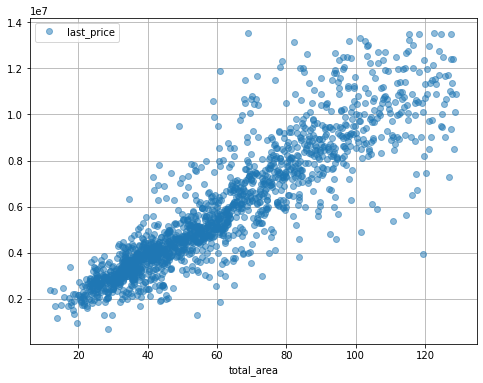

In [102]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(8, 6), alpha=0.5)
plt.show()

На графике видно зависимость цены от общей площади в интервале от 20 до 65 кв.м по оси X. Далее зависимость уменьшается.

**Зависимость цены от жилой площади:**

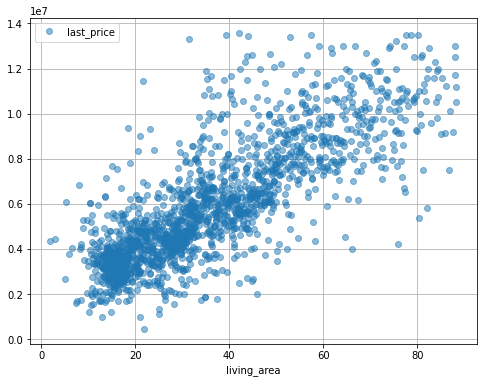

In [103]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(8, 6), alpha=0.5)
plt.show()

Заметна зависимость цены от жилой площади на интервале до 50 кв.м., но не так чётко как с общей площадью. 

**Зависимость цены от площади кухни:**

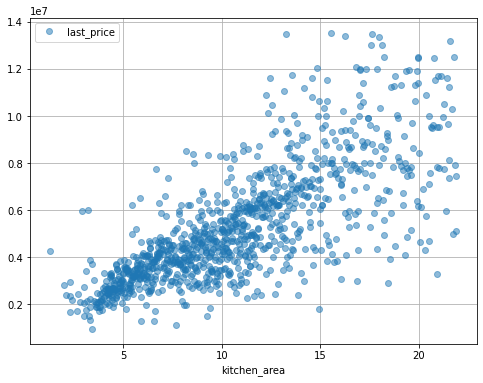

In [104]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(8, 6), alpha=0.5)
plt.show()

На графике заметна зависимость на интервале до 11 кв.м., но уже меньше чем от общей площади.

**Зависимость цены от количества комнат:**

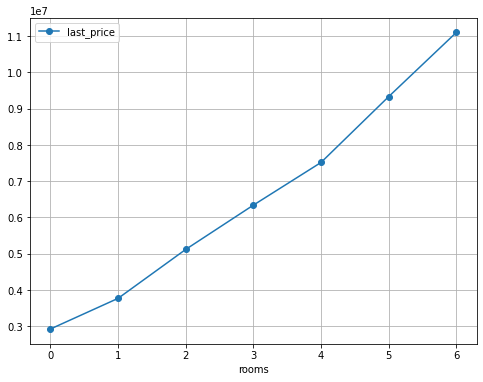

In [105]:
# Зависимость цены от количества комнат:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(8, 6))
plt.show()

На графике видно что с увелечением количества комнат растёт цена. Это вполне логично, так как с увелечением количества комнат увеличивается жилая площадь и общая площадь.

**Зависимость цены от цены одного квадратного метра:**

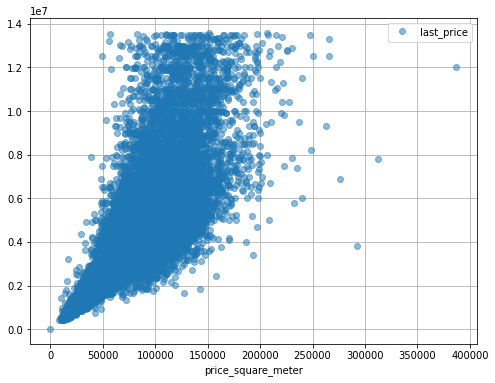

In [106]:
data.pivot_table(index='price_square_meter', values='last_price').plot(grid=True, style='o', figsize=(8, 6), alpha=0.5)
plt.show()

Зависимость цены от цены одного квадратного метра присутствует и более выражена в интервале до 120000.

**Зависимость цены от растояния до центра:**

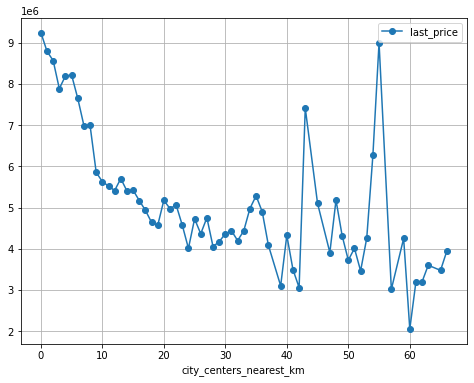

In [107]:
data.pivot_table(index='city_centers_nearest_km', values='last_price').plot(grid=True, style='o-', figsize=(8, 6))
plt.show()

Присутствует сильная обратная зависимость в начале графика в интервале до 20км. Далее зависимость уменьшается и имеет скачки. Большие пики на отметке 44км и 55км, вероятно на таком растоянии находятся престижные населённые пункты. 

**Зависимость цены от дня публикации:**

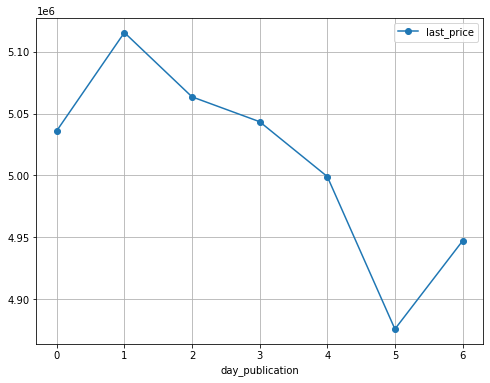

In [108]:
data.pivot_table(index='day_publication', values='last_price').plot(grid=True, style='o-', figsize=(8, 6))
plt.show()

Зависимость незначительная. При этом имеется максим в начале недели с падением к концу недели.

Вероятно в понедельник выгружаются новые объявления. И не получив ожидаемое количество звонков начинают снижение цены.

**Зависимость цены от месяца публикации:**

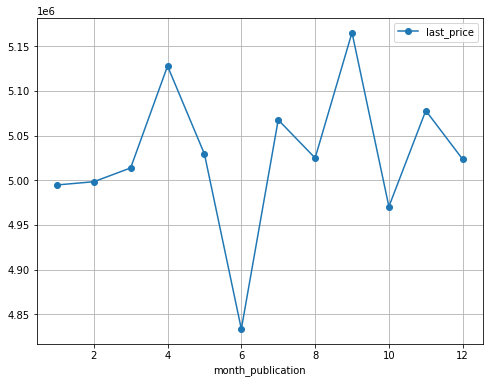

In [109]:
data.pivot_table(index='month_publication', values='last_price').plot(grid=True, style='o-', figsize=(8, 6))
plt.show()

Зависимость незначительная. Имеется максимум в апреле и сентябре, минимум в июне. Разница между максимум и минимум в пределах 5%.

**Зависимость цены от года публикации:**

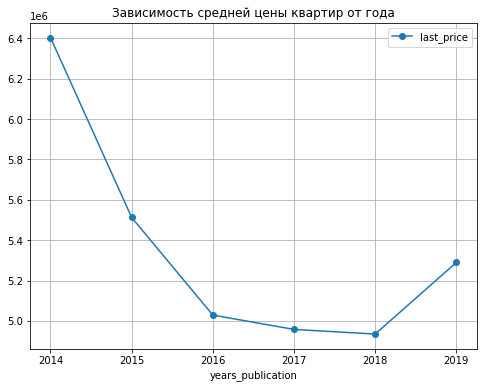

In [110]:
data.pivot_table(index='years_publication', values='last_price').plot(grid=True, style='o-', figsize=(8, 6))
plt.title('Зависимость средней цены квартир от года')
plt.show()

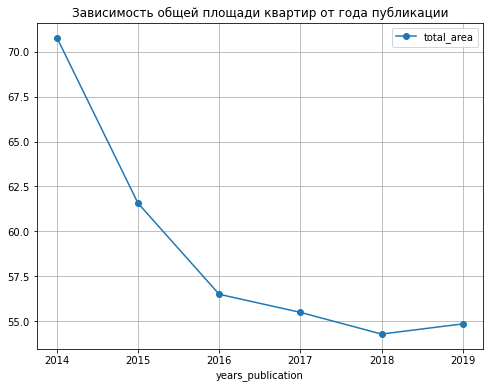

In [111]:
data.pivot_table(index='years_publication', values='total_area').plot(grid=True, style='o-', figsize=(8, 6))
plt.title('Зависимость общей площади квартир от года публикации')
plt.show()

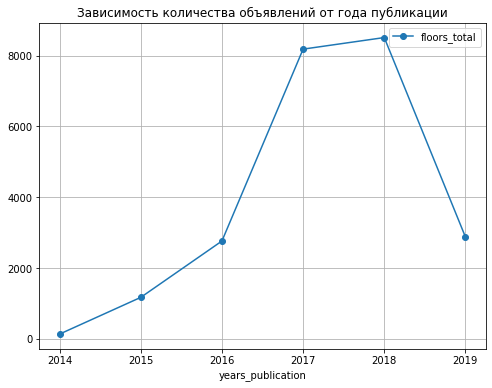

In [112]:
data.pivot_table(index='years_publication', values='floors_total', aggfunc='count').plot(grid=True, style='o-', figsize=(8, 6))
plt.title('Зависимость количества объявлений от года публикации')
plt.show()

Видно большое падение в начале графика, затем 3 года цена стабильно держалась на минимуме и последний год небольшой рост. В тоже время заметно снижение общей площади квартир к среднестатистическим 52 кв.метра и в 2017-2018 году был максимум предложений по квартирам. Вероятно это связано с кризисом, который начался в 2014 году.

**Зависимость цены от этажа расположения квартиры:**

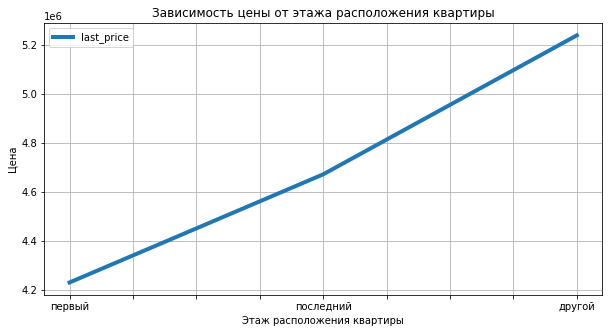

In [113]:
data.pivot_table(index='floor_categor', values='last_price')\
    .sort_values(by='last_price', ascending=True) \
    .plot(grid=True, figsize=(10, 5), linewidth=4, title='Зависимость цены от этажа расположения квартиры')

plt.xlabel('Этаж расположения квартиры')
plt.ylabel('Цена')
plt.show()

Присутвует зависимость. На первых этажах цена меньше всего, возрастает на последнем этаже. На средних этажах цена существенно выше.

##### Вывод.

**Вывод:**
- **Самая большая зависимость цены квартиры от общей площади, количество комнат, этажа расположение квартиры.** 
- **Значительно на цену квартиры влияет удалённость квартиры от центра города.**
- **Вероятность продать квартиру по максимальной цене больше в апреле и сентябре. В июне заметно небольшое снижение цен.**
- **Так же на цену влияет покупательская способноть и спрос. В 2016-2019 на рынке было больше предложений на квартры 52-56 кв.метров. Спрос пораждает предложения. В 2017-2018 годах было максимум количества предложений.**

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [114]:
top10_locality = data.pivot_table(index='locality_name', values='floors_total', aggfunc='count')
top10_locality.columns = ['count']
top10_locality = top10_locality.sort_values(by='count', ascending=False).head(10)
top10_locality['price_square_meter'] = data.pivot_table(index='locality_name', values='price_square_meter').round(2)
top10_locality.sort_values(by='price_square_meter', ascending=False)

,count,price_square_meter
locality_name,,
Санкт-Петербург,15721,114849.01
Пушкин,369,103125.82
Кудрово,472,95324.93
Парголово,327,90175.91
Мурино,590,86087.51
Шушары,440,78677.36
Колпино,338,75424.58
Гатчина,307,68746.15
Всеволожск,398,68654.47


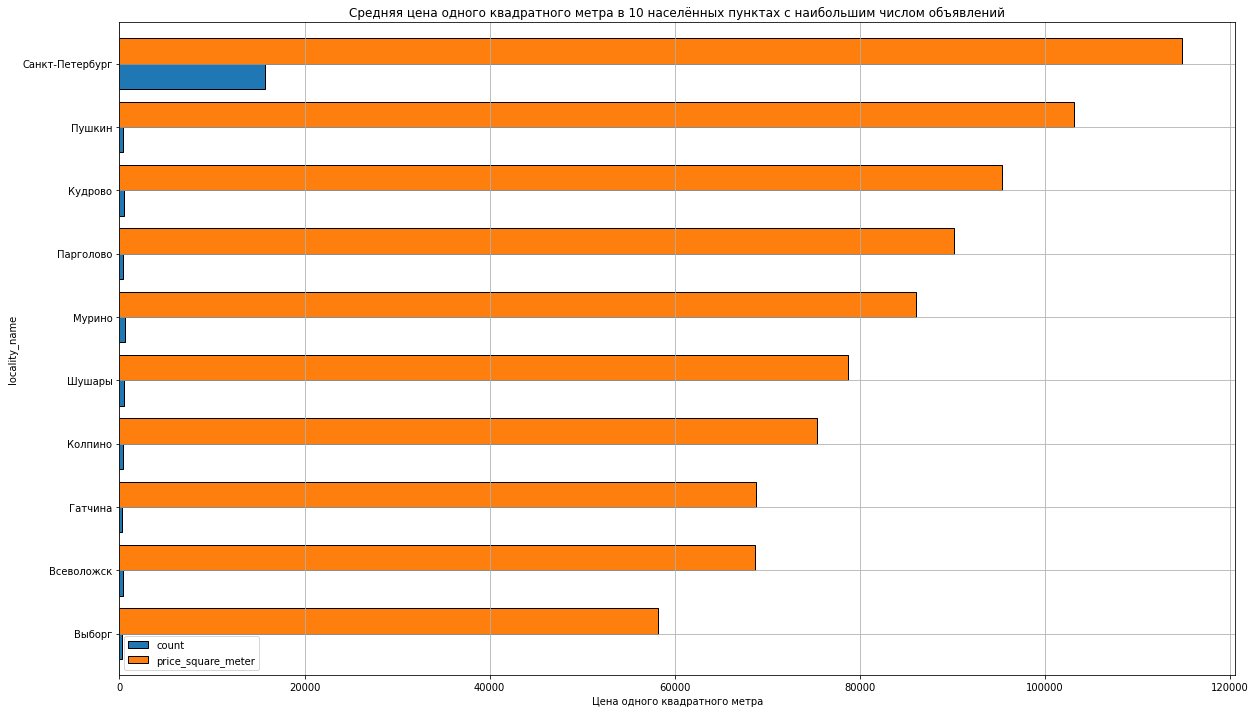

In [115]:
top10_locality\
    .sort_values(by='price_square_meter')\
    .plot(grid=True, figsize=(20, 12), kind = 'barh', width=0.8, ec='black');
plt.title('Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений')
plt.xlabel('Цена одного квадратного метра')
plt.show()

##### Вывод:

- **Наибольшая цена за кв. метр в Санкт-Петербург почти 115 тыс. рублей.**
- **На втором месте Пушкин более 103 тыс. рублей, который находится в пригороде Санкт-Петербурга.**
- **Наименьшая цена из топ-10 в Выборге чуть больше 58 тыс. рублей, что обосновано большой удаленостью от Санкт-Петербурга.**

#### Выделим квартиры в Санкт-Петербурге и вычислим их среднюю стоимость на разном удалении от центра.

In [116]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb['city_centers_nearest_km'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

Квартиры в Санкт-Петербурге расположены в радиусе 29 км от картографического центра города.

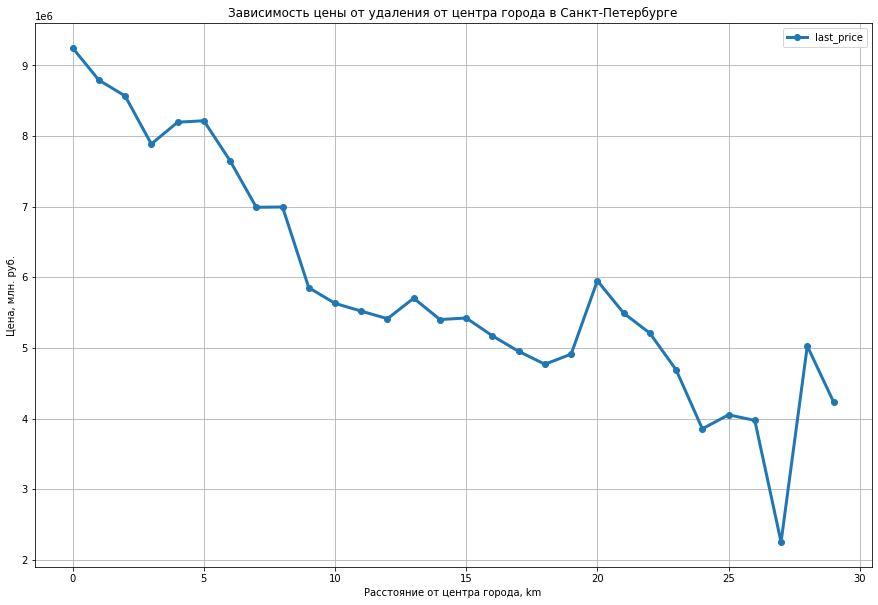

In [117]:
data_spb.pivot_table(index='city_centers_nearest_km', values='last_price')\
    .plot(style='o-', figsize=(15, 10), linewidth=3, grid=True)
plt.title('Зависимость цены от удаления от центра города в Санкт-Петербурге')
plt.xlabel('Расстояние от центра города, km')
plt.ylabel('Цена, млн. руб.')
plt.show()

In [118]:
print('Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург:')
data_spb.pivot_table(index='city_centers_nearest_km', values='last_price')

Таблица средней стоимость квартир в зависимости от удаления центра города Санкт-Петербург:


,last_price
city_centers_nearest_km,
0.0,9.248333e+06
1.0,8.792538e+06
2.0,8.567986e+06
3.0,7.887593e+06
4.0,8.195807e+06
5.0,8.217114e+06
6.0,7.650528e+06
7.0,6.991187e+06
8.0,6.995419e+06


Выведим строки в которых столбцы `locality_name`= Санкт-Петербург	и `city_centers_nearest_km`= 27.

In [119]:
data_spb.loc[data['city_centers_nearest_km'] ==27].sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_publication,month_publication,years_publication,floor_categor,city_centers_nearest_km
5961,6,2250000.0,32.0,2018-02-27,1.0,2.65,2,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0.0,NaN,0.0,NaN,178.0,70312.50,1,2,2018,последний,27.0
748,13,NaN,74.0,2017-11-28,2.0,3.13,5,30.0,3,False,False,False,NaN,0,Санкт-Петербург,23888.0,27313.0,1.0,1496.0,0.0,NaN,128.0,193918.92,1,11,2017,другой,27.0


Таких строк всего 2. Причём в одной из строк имеется выбивающее значение в стобце `last_price` (было отфильтровано ранее).

Посмотрим какие населённые пункты находятся на расстояниие от 0 до 30км и количество объявлений в них:

In [120]:
data.pivot_table(index='city_centers_nearest_km', columns='locality_name', values='floors_total', aggfunc='count')\
    .head(31)\
    .style.format("{:.1f}")\
    .background_gradient(cmap='Blues', axis=1)

locality_name,Александровская,Белоостров,Зеленогорск,Колпино,Красное Село,Кронштадт,Левашово,Лисий Нос,Ломоносов,Металлострой,Молодежное,Мурино,Павловск,Парголово,Песочный,Петергоф,Петро-Славянка,Понтонный,Пушкин,Репино,Санкт-Петербург,Саперный,Сестрорецк,Стрельна,Усть-Ижора,Шушары,Щеглово
city_centers_nearest_km,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,27.0,nan,nan,nan,nan,nan,nan
1.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,192.0,nan,nan,nan,nan,nan,nan
2.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,310.0,nan,nan,nan,nan,nan,nan
3.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,350.0,nan,nan,nan,nan,nan,nan
4.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,688.0,nan,nan,nan,nan,nan,nan
5.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,920.0,nan,nan,nan,nan,nan,nan
6.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,618.0,nan,nan,nan,nan,nan,nan
7.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,420.0,nan,nan,nan,nan,nan,nan
8.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,597.0,nan,nan,nan,nan,nan,nan


**Из сводной таблицы видно что кроме Санкт-Петербурга в диапазоне от 0 до 29 км от центра Санкт-Петербурга входят и другие населённые пункты: Шушары (с 17км); Парголово (с 18км); 	Пушкин (с 24км) и т. д. Всё эти населённые пункты это пригород Санкт-Петербурга и которые входят в его состав. От сюда колебания графика после 18км.** <br>
**Логично предположить, что пользователи по разному указывают населённые пункты. Указав к примеру Пушкин как Санкт-Петербург не будет являться ошибкой, т.к. Пушкин является пригородным районом. Так же возможно совпадение адресов (в городах есть улицы с одинаковыми названиями).**

In [121]:
data.pivot_table(index='floor_categor', columns='city_centers_nearest_km', values='floors_total', aggfunc='count')\
    .apply(lambda x: x*100/sum(x))\
    .style.format("{:.1f}")\
    .background_gradient(cmap='Blues', axis=1)

city_centers_nearest_km,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,39.0,40.0,41.0,42.0,43.0,45.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,57.0,59.0,60.0,61.0,62.0,63.0,65.0,66.0
floor_categor,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
другой,74.1,63.5,59.4,61.7,71.8,75.4,73.6,77.6,79.4,76.2,75.9,77.8,79.4,82.2,81.5,81.2,79.8,78.6,80.8,86.1,95.0,75.0,83.3,71.8,71.6,72.6,54.9,64.4,66.0,59.0,59.3,58.9,52.2,68.7,68.3,62.2,65.9,61.5,nan,68.8,77.8,16.7,20.0,nan,71.4,50.0,59.3,73.1,50.0,58.9,53.6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
первый,11.1,12.5,14.5,15.7,11.5,8.9,10.5,7.6,8.9,9.1,10.3,12.6,11.1,7.9,8.7,9.4,10.2,11.5,8.4,6.1,0.8,10.4,7.2,10.3,16.4,17.8,24.6,14.4,15.1,20.1,19.6,19.5,23.9,17.9,17.5,18.4,7.3,15.4,nan,18.8,11.1,16.7,20.0,nan,17.9,20.0,22.2,17.3,17.3,19.6,28.6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
последний,14.8,24.0,26.1,22.6,16.7,15.7,15.9,14.8,11.7,14.7,13.8,9.7,9.5,9.9,9.8,9.4,10.0,9.9,10.8,7.8,4.1,14.6,9.5,17.9,12.1,9.6,20.5,21.2,18.9,20.9,21.0,21.6,23.9,13.4,14.2,19.4,26.8,23.1,nan,12.5,11.1,66.7,60.0,nan,10.7,30.0,18.5,9.6,32.7,21.4,17.9,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Из таблицы видно что на 2 и 3 километре больше предложений на первом этаже, так же на последнем этаже доля предложений высокая. На 5 километре заметно сокращается доля первых этажей в пользу средних этажей и на последнем значительно меньше. 

##### Вывод:

- **В интервале от 0 до 4 км от центра Санкт-Петербурга средняя цена квартир самая высокая.**
- **На растоянии от 5 до 9 км цены на квартиры существенно снижаются, теряя до 500 тыс. рублей на километр.**
- **На растоянии от 9 до 19 км цены на квартиры начинают снижатся плавно, в среднем теряя не более 100 тыс. на километр.**
- **На растоянии более 17 км цены на квартиры то растут, то падают. Это связано с нахождением на этом расстоянии пригородов Санкт-Петербурга, которые входят в его состав.**
- **В непосредственной близости к центру Санкт-Петербурга большая доля квартир на продаже на первом и последнем этажах.**

**Можно сделать вывод что условный центр города Санкт-Петербург это радиус 8 км от картографического центра.**


## Общий вывод.

В ходе исследования объявлений о продаже квартир в Санкт-Петербурге и его пригородах были выполнены следующие этапы и сделаны выводы:<br>
1. Изучили общую информацию о данных:<br>
В таблице 23699 строки и 22 столбца. Явные дубликаты отсутвуют. Во многих стобцах имеются пропуски и некорректный тип данных. Так же присутсвуют аномальные значения.
2. Выполнена предобработка данных:
- Переименован столбец `cityCenters_nearest` в соответствии со стилем snake_case на `city_centers_nearest`.
- В столбцах "ceiling_height", "floors_total", "living_area", "kitchen_area", "is_apartment", "balcony" пропуски были заполнены соответсвующими значениями. В столбце "locality_name" пропуски были удалены.
- В стобцах "floors_total", "is_apartment", "balcony","last_price", "first_day_exposition" был изменён некоректный тип.
- В столбце "locality_name" исправлены неявные дубликаты.
- Сделан вывод что пропуски в данных возникли из-за не заполнения всех значений пользователями и технического фактора (сбои при загрузке и выгрузки данных).
3. Сделаны расчёты и добавлены новые столбцы в таблицу для проведения следующего этапа:
 - `price_square_meter` - цена одного квадратного метра;
 - `day_publication` - день недели публикации объявления;
 - `month_publication` - месяц публикации объявления;
 - `years_publication` - год публикации объявления;
 - `floor_categor` - тип этажа квартиры (значения — «первый», «последний», «другой»);
 - `city_centers_nearest_km` - расстояние до центра города в километрах.
4. Проведен исследовательский анализ данных:
- Изучены и описаны параметры:<br>
 - общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; тип этажа квартиры; общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего парка
 - Сделан вывод по типичной квартире из предложений: 2-комнатная квартира площадью 45 кв.метров с жилой площадью 30 кв.метров, имеет кухню 6 кв.метра и высотой потолка 2.65 метра. Расположенная на среднем этаже 5-этажного дома. Что соответствует по описанию квартирам-"хрущёвкам". Так же она находится в 11-18 километров от центра и в шаговой доступности до парка, то находится в "спальном" районе.
-  Иследовано как быстро продавались квартиры:
 - Среднее значение продажи составляет 181 дня.Среднее значение не верно характерезует время продажи, так как в данных много больших значений с долгой продажей. Медианное значение - 95 дня, оно более точно характеризует время продажи, так как не зависит от выбросов и нестандартных значений.
 - В среднем продажа средней квартиры занимает 2-4 месяца (в зависимости от цены).
 - Быстрые продажи - состоявшиеся за 45 дней, а долгие продажи - более 231 дня и могут совсем не продаваться.
  - Данные о сколько дней было размещено объявление не достаточно верно указывают о времени продажи квартиры, так как нет данных по какой причине было снято объявление и снято вообще после продажи. 
- Определены факторы влияющие на общую стоимость объекта:
 - Самая большая зависимость цены квартиры от общей площади, количество комнат и этажа расположение квартиры.
 - Значительно на цену квартиры влияет удалённость квартиры от центра города.
 - Вероятность продать квартиру по максимальной цене больше в апреле и сентябре. В июне заметно небольшое снижение цен.
 - Так же на цену влияет покупательская способноть и спрос. В 2016-2019 на рынке было больше предложений на квартры 52-56 кв.метров. Спрос пораждает предложения. В 2017-2018 годах было максимум по количествам предложений.
- Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
 - Наибольшая цена за кв. метр в Санкт-Петербург почти 115 тыс. рублей.
 - На втором месте Пушкин более 103 тыс. рублей, который находится в пригороде Санкт-Петербурга.
 - Наименьшая цена из топ-10 в Выборге чуть больше 58 тыс. рублей, что обосновано большой удаленостью от Санкт-Петербурга.
- Вычислена средняя стоимость квартиры на разном удалении от центра Санкт-Петербурга:
 - Сделан вывод что условный центр города Санкт-Петербург это радиус 8 км от картографического центра. На растоянии 17 и более километров находятся пригородные населённые пункты, которые входят в состав Санкт-Петербурга.
 - В непосредственной близости к центру Санкт-Петербурга большая доля квартир на продаже на первом и последнем этажах.
